# Ladesäulen

Von  Jannis Breitenstein <br>


Diese Notebook ist in folgende Abschnitte unterteilt:

+ [1. Import Bibliotheken](#1)<br>
+ [2. Laden und Aufbereiten der Zapfsäulendaten](#2)<br>
+ [2.1 Laden und Aufbereitung der Daten](#2.1)<br>
+ [2.2 Exportieren und Einlesen der Daten](#2.1)<br>
+ [3. Explorative Datenanalyse](#3)<br>
+ [3.1 Allgeime Daten über die Datensets](#3.1)<br>
+ [3.2 Veröffentlichung der Filme](#3.2)<br>
+ [3.3 Verteilung der Filmbewertungen](#3.3)<br>
+ [3.4 Wann sind die Filme bewertet worden](#3.4)<br>
+ [3.5 Verteilung von Filmbewertungen und Benutzern](#3.5)<br>
+ [4. Filtern der Daten](#4)<br>
+ [5. Anweden des KNN-Modells](#5)<br>
+ [5.1 Vorbereitung des KNN-Modells](#5.1)<br>
+ [5.2 Berechnung von allen Nachbarn und Export](#5.2)<br>
+ [5.3 Vorbereitung für Precision and Recall](#5.3)<br>
+ [5.4 Presicion and Recall](#5.4)<br>
+ [5.5 Empfehlung mit Hilfe des Fuzzy Algorithmus](#5.5)<br>
***

In [ ]:
##  cd C:\Python\KFW_V1
##  !{sys.executable} -m pipenv shell
## dsad
"""
pip3 install virtualenv
cd C:\Python\KFW_V1\kfw> 
python -m venv kfw  --> Zum Erstellen, wenn bereits vorhanden dann Active
.\kfw\Scripts\activate
--> When Activation is failing: Set-ExecutionPolicy -Scope CurrentUser -ExecutionPolicy Unrestricted --> Repeat step four
--> to run the Jupyter Notebook in virtual Enviroment it is recommended to install all jupyter dependencies --> !{sys.executable} -m pip3 install jupyter

pip freeze > requirements.txt

"""


# <a id=1>1. Import Bibliotheken </a>


In [ ]:
"""

import sys
!{sys.executable} --version
print(sys.executable)
!{sys.executable} -m pip install autokeras
!{sys.executable} -m pip install altair
!{sys.executable} -m pip install bayesian-optimization
!{sys.executable} -m pip install chart_studio
!{sys.executable} -m pip install cx_Oracle
!{sys.executable} -m pip install dython
!{sys.executable} -m pip install fastparquet
!{sys.executable} -m pip install fuzzywuzzy
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install glom
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install ipython-sql
# Wichtig
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install lime
!{sys.executable} -m pip install nltk
# Wichtig
!{sys.executable} -m pip install numpy
# Wichtig
!{sys.executable} -m pip install notebook 
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install openpyxl
# Wichtig
!{sys.executable} -m pip install pandas
#
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install pyarrow
!{sys.executable} -m pip install python-Levenshtein
!{sys.executable} -m pip install prettytable
!{sys.executable} -m pip install pyspark
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install surprise
!{sys.executable} -m pip install scikit-surprise 
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install spaCy
!{sys.executable} -m pip install sqlalchemy
!{sys.executable} -m pip install talos
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install wrangle
!{sys.executable} -m pip install requests

"""

In [ ]:
# Zum Speichern der Daten
import pandas as pd

# Wird zur Erstellung mehrdimensionalen Arrays benötigt
import numpy as np

# interaktive Diagramme erstellen
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

import seaborn as sns

import geopandas as gpd

***
# <a id=2>2. Laden und Aufbereiten der Daten </a>

***

## 2.1 Datenaufbereitung </a>
***

In [ ]:
# Define actual Datapath
path = "C:/Python/KFW_V1/Ladesaeulenregister.csv"

df_raw= pd.read_csv(path,
                encoding = "ISO-8859-1",
                delimiter= ';',
                decimal= ',',
                skiprows = 10,
                engine = 'python')


del  path

In [ ]:
df = df_raw

## Daten in Float Formatieren
#df['Längengrad'] = df['Längengrad'].str.replace(',','.')
## Datenqualität, Eine Zahl besitzt ein Punkt
#df['Breitengrad'] = df['Breitengrad'].str.replace('.','0')
#df['Breitengrad'] = df['Breitengrad'].str.extract('.',)
# df['Breitengrad'] = df['Breitengrad'].str.replace(',','.')
#df['Breitengrad'] = df['Breitengrad'].str.rstrip('.')

df = df[df['Breitengrad'].str.contains('52,19168124567324.') == False]
df['Breitengrad'] = df['Breitengrad'].astype(float)

#df['Breitengrad'] = df['Breitengrad'].replace('.',',')


df['P4 [kW]'] = df['P4 [kW]'].str.replace(',','.') 
df['P4 [kW]'] = df['P4 [kW]'].replace(',','.') 
df['P4 [kW]'] = df['P4 [kW]'].str.replace('','') 
df['P4 [kW]'] = df['P4 [kW]'].str.replace(' ','') 
df['P4 [kW]'] = df['P4 [kW]'].replace('','0')

df['P4 [kW]'] = df['P4 [kW]'].astype(float)

df['P4 [kW]'] = df['P4 [kW]'].replace('.',',')

df['Inbetriebnahmedatum'] = pd.to_datetime(df.Inbetriebnahmedatum, dayfirst= True)

Convert_df= {'Betreiber': 'object',
                 'Straße': 'object', 
                 'Hausnummer': 'object',
                 'Adresszusatz' : 'object',
                 'Ort' : 'object',
                 'Bundesland' : 'object',
                 'Kreis/kreisfreie Stadt' : 'object',
                 'Breitengrad' : 'float',
                 'Längengrad' : 'float',
                 'Inbetriebnahmedatum' : 'datetime64',
                 'Anschlussleistung' : 'float',
                 'Normalladeeinrichtung' : 'object',
                 'Anzahl Ladepunkte' : 'int64',
                 'Steckertypen1' : 'object',
                 'P1 [kW]' : 'float',
                 'Public Key1' : 'object',
                 'Steckertypen2' : 'object',
                 'P2 [kW]' : 'float',
                 'Public Key2' : 'object',
                 'Steckertypen3' : 'object',
                 'P3 [kW]' : 'float',
                 'Public Key3' : 'object',
                 'Steckertypen4' : 'object',
                 'P4 [kW]' : 'float',
                 'Public Key4' : 'object'
                  }

df = df.astype(Convert_df)

print(df.info())




In [ ]:
display(df)

***
## 2.2 Allgemeine Informationen zum Datenset </a>
***

In [ ]:
df = df_raw
# Ausgabe Datentypen
#What are the datatypes in each column?
print(df.info())

# Let's see what attributes columns we have.
print(df.columns)

# There are quite some columns. How many, actually?
# How many columns do you have?
print(len(df.columns))

# Wie viele Datensätze haben wir spirch Spalten
print(len(df.index))

# Was ist die Dimension vom Datenset
#What is the dimension of the dataset? Note: Your answer should be a tuple value.
print(df.shape)

## Wie viele Werte haben die einzelen Spalten
print(df.count())

## Anzeigen der aktuellen Datenstruktur
#display(df)

del df

In [ ]:
## Löschen von doppelten Spalten
df_f = df

# Drop all rows with NaN.
df_f = df_f.dropna(axis = 0, how = 'all', inplace = False)
#df_f = df_f.fillna("", inplace=False)

#df_null_values = df_f.isnull().sum()


print('Vor dem entfernen hatte der Datensatz {} Zeilen. Nach dem entfernen {}  Insgesamt wurden  entfernt'.format(len(df.index), len(df_f.index) ))

del df_f

In [ ]:
##  Ausgabe der Duplikate
dupli = df.duplicated(keep=False).sum()
print('In dem Datensatz Ladensauelenregister liegen {} Duplikate vor'.format(dupli))

duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF = duplicateRowsDF.sort_values(by=['Breitengrad'])
display(duplicateRowsDF)


del duplicateRowsDF , dupli

In [ ]:
## Exportieren der Dateien in eine CSV

path_csv = "C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.csv"
df.to_csv(path_csv,
            sep = ';',
            header = True,
            index= True,
            decimal= ','
            
            )

In [ ]:
# Exportieren der Daten in ein Parquet
parquet_df= 'C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.zip'
df.to_parquet(parquet_df, index = True)


In [ ]:
display(df)


***
# <a id=2>2. Explorative Datenanalyse </a>

***



## 2.1. Importieren der Daten </a>

In [ ]:
parquet_df= 'C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.zip'
df = pd.read_parquet(parquet_df)

Convert_df= {'Betreiber': 'object', 
                 'Straße': 'object', 
                 'Hausnummer': 'object',
                 'Adresszusatz' : 'object',
                 'Ort' : 'object',
                 'Bundesland' : 'object',
                 'Kreis/kreisfreie Stadt' : 'object',
                 'Breitengrad' : 'float',
                 'Längengrad' : 'float',
                 'Inbetriebnahmedatum' : 'datetime64',
                 'Anschlussleistung' : 'float',
                 'Normalladeeinrichtung' : 'object',
                 'Anzahl Ladepunkte' : 'int64',
                 'Steckertypen1' : 'object',
                 'P1 [kW]' : 'float',
                 'Public Key1' : 'object',
                 'Steckertypen2' : 'object',
                 'P2 [kW]' : 'float',
                 'Public Key2' : 'object',
                 'Steckertypen3' : 'object',
                 'P3 [kW]' : 'float',
                 'Public Key3' : 'object',
                 'Steckertypen4' : 'object',
                 'P4 [kW]' : 'float',
                 'Public Key4' : 'object'
                  }

df = df.astype(Convert_df)


## 2.2. Allgeime Daten über die Datensets </a>

In [ ]:
# Show missing values in a figure in PDF

plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Greys')
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
plt.savefig('C:/Python/KFW_V1/Ladesaeulenregister_Duplis.pdf')
plt.close()


In [ ]:
print('# Anzahl der Betreiber bei Gruppe \n ')
df_Betreiber_cnt_tmp = df.groupby(['Betreiber'])['Betreiber'].count().sort_values(ascending=False)
print(df_Betreiber_cnt_tmp.head(10))
print('\n')

print( '# Anzahl der Normalladeeinrichtung \n')
df_n_cnt = df.groupby(['Normalladeeinrichtung'])['Normalladeeinrichtung'].count().sort_values(ascending=False)
print(df_n_cnt.head(10))
print('\n')


print('# Gruppierung nach Anschlussleistung \n') 
df_An_cnt = df.groupby(['Anschlussleistung'])['Anschlussleistung'].count().sort_values(ascending=False)
print(df_An_cnt.head(10))
print('\n')

print('# Gruppierung nach Bundesland \n') 
df_B_cnt = df.groupby(['Bundesland'])['Bundesland'].count().sort_values(ascending=False)
print(df_B_cnt.head(10))
print('\n')

print('# Gruppierung nach Max Leistung \n') 
df_kw_cnt = df.groupby(['P1 [kW]'])['P1 [kW]'].count().sort_values(ascending=False)
print(df_kw_cnt.head(10))
print('\n')


print('# Anzahl von Ladepunkten innerhalb von Deutschland \n') 
df_lp_cnt = df.sum(['Anzahl Ladepunkte'])
print(df_lp_cnt.)
print('\n')

print('# Anzahl von Ladepunkten innerhalb von Deutschland \n') 
df_lp_cnt = df['Anzahl Ladepunkte']
df_lp_cnt = df_lp_cnt.sum(axis = 0, skipna = True)
print(df_lp_cnt)
print('\n')

print('# Anzahl der maximalen Ladepunkten innerhalb von Deutschland \n') 
df_lpm_cnt = df['Anzahl Ladepunkte']
df_lpm_cnt = df_lp_cnt.max()
print(df_lp_cnt)
print('\n')

# Durchschnittswert
print('# Ermittlung der Durchscnittswerte \n') 
list_columns = ['Anschlussleistung',
                'Anzahl Ladepunkte', 'P1 [kW]', 'P2 [kW]', 'P3 [kW]', 'P4 [kW]']
df1 = df[list_columns]
print(df1.mean(axis=0, skipna = True))



del df_Betreiber_cnt_tmp ,df_n_cnt ,df_An_cnt ,df_B_cnt ,df_kw_cnt , df_lp_cnt, df_lpm_cnt , df1

In [ ]:
# Daten einholen
#data = df['Inbetriebnahmedatum'].value_counts().sort_index()
data = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y').value_counts().sort_index()
#df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')

# Linie erstellen
trace = go.Scatter(x = data.index,
                   y = data.values,
                   marker = dict(color = '#db0000'))
# Layout erstellen
layout = dict(title = '{} Ladesäulen sortiert nach Inbetriebnahme'.format(df.shape[0]),
              xaxis = dict(title = 'Inbetriebnahmejahr'),
              yaxis = dict(title = 'Säule'))

# Plot erstellen
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


del layout, trace, fig, data

In [ ]:
# Darstellen der Stationen innerhalb Deutschland

gdf = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.Längengrad, df.Breitengrad))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Germany'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue', )

plt.show()


C:\Users\jsbreite\AppData\Local\Temp\ipykernel_17668\2277847886.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



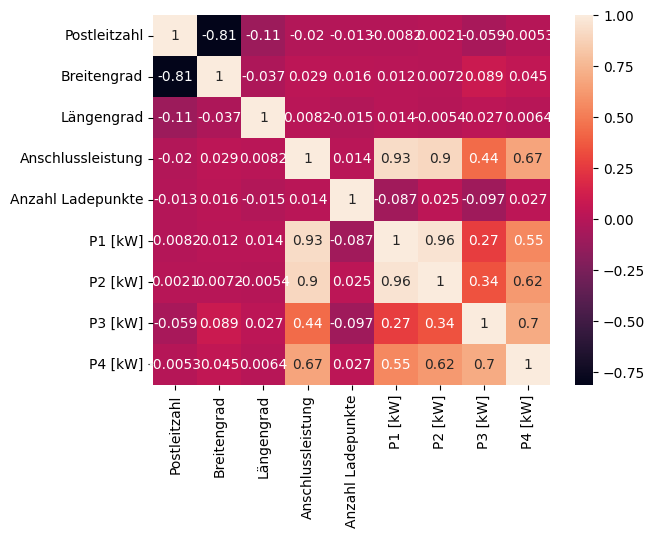

In [47]:
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')# Drop all rows with NaN.
# df = df.dropna(axis=0)
df_null_values = df.isnull().sum()
# print('NANs_After_Update?', df_null_values)
# print('// complete ........ Pre-Processing')
# ------------------------------------------
# Exploring the Data
# ------------------------------------------
# Select only the inserting one
list_columns = ['Bundesland','Postleitzahl', 'Breitengrad', 'Längengrad',
                'Inbetriebnahmedatum', 'Anschlussleistung',
                'Normalladeeinrichtung', 'Anzahl Ladepunkte']
df = df[list_columns]
# Count column over yeas. Output: Series. Therefore, convert to pandas DataFrame.

df_year_count = df['Inbetriebnahmedatum'].dt.year.value_counts().to_frame()
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
sns.barplot(data=df_year_count, x=df_year_count.index, y="Inbetriebnahmedatum", color='gray',
             linewidth=1.0)  # , marker='o', label='Portfolio Value', ax=ax[0])
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.savefig('fig_count_plot_count_year.pdf')
plt.close()
print('// complete ....... count plot')